In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

haber = pd.read_csv(r"C:\Users\Asus\Downloads\haberman.csv")

haber.head()

#have a glimpse of the haberman data in table

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [2]:
print(haber.shape)
#to check out the size of file that i am handling

(306, 4)


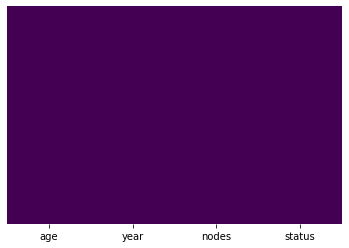

In [3]:
sns.heatmap(haber.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#finding if there are any missing values
#so, no value is missing here!

In [4]:
print(haber.info())
#double checked for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB
None


In [5]:
print(haber.describe())

#patients are of ages between 30 and 83 years
#Even patients with as low as 0 nodes and as high as 52 nodes are being treated 

              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


In [6]:
haber['status'].value_counts()
#looks like 73.5% of the patients belonged to Class 1 status

1    225
2     81
Name: status, dtype: int64

In [7]:
haber['nodes'].value_counts()   

#i doubt that number of nodes have a lot to do with the status so i checked 
#As we can see 70% of the patients have nodes less than equal 3 when admitted
#Almost half of them had clear nodes

#i can speculate that number of patients surviving more thn 5 years is inversely related to the number of nodes in the patients

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: nodes, dtype: int64

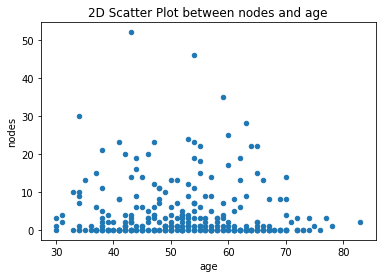

In [8]:
#2-D scatter plot:

haber.plot(kind='scatter', x='age', y='nodes') 
plt.title("2D Scatter Plot between nodes and age")
plt.show()

#cannot make much sense out it. 
#not a clear plot

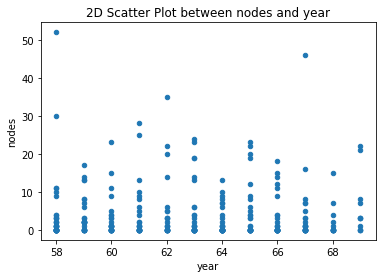

In [9]:
#tried with different factors

haber.plot(kind='scatter', x='year', y='nodes') 
plt.title("2D Scatter Plot between nodes and year")
plt.show()

#was of no use 
#What if we color the points by their class-label 

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


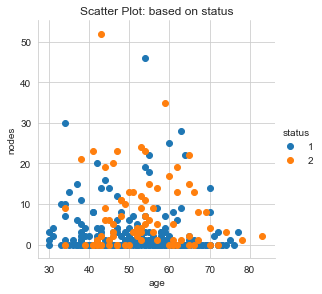

In [10]:

sns.set_style("whitegrid");
sns.FacetGrid(haber, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title("Scatter Plot: based on status")
plt.show();

#here also pattern cant be seen


C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


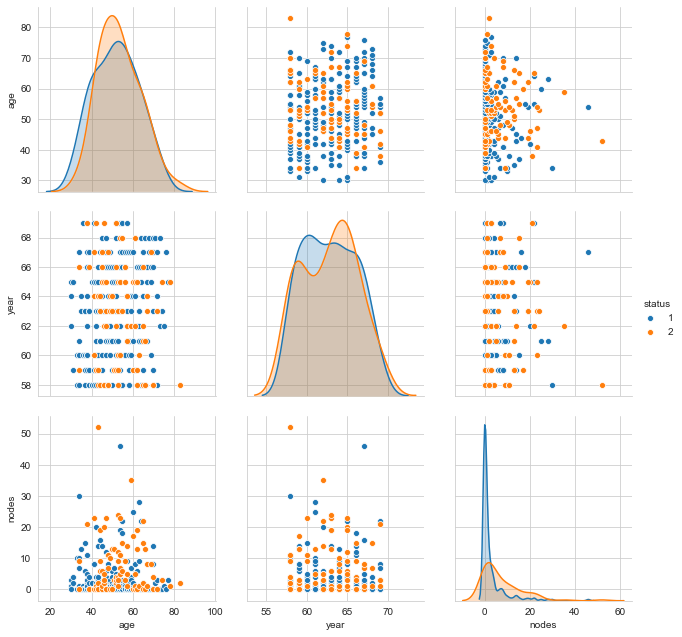

In [11]:
# pairwise scatter plot: Pair-Plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haber, hue="status", vars=['age', 'year', 'nodes'], size=3);
plt.show()
# Row 1: Here, the 3rd plot is somewhat distinguishable and better than other plots in the row. The axes are age and auxiliary nodes.
# Row 2: There is no clear pattern or distinction in any of the graphs
# Row 3: Here, 1st plot is better distinguishable but it is the same as the 3rd plot of 1st row.
# Row 4: There is no clear pattern or distinction in any of the graphs

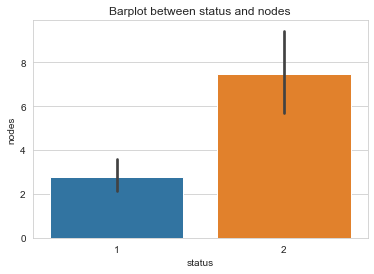

In [12]:
sns.barplot(x="status",y='nodes',data=haber)
plt.title("Barplot between status and nodes")
plt.show()

#clearly patients with less than 3 nodes survived for more than 5 years as Status=1
# all the patients having more than 3 nodes belong to status 2

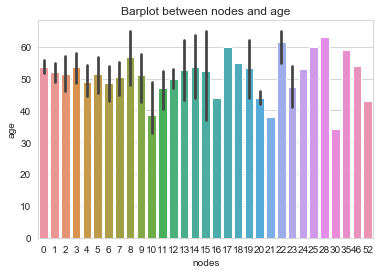

In [13]:
sns.barplot(x="nodes",y='age',data=haber)
plt.title("Barplot between nodes and age")
plt.show()

#no clear relation can be seen

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


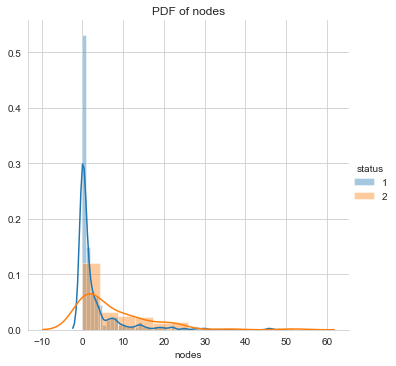

In [14]:
sns.FacetGrid(haber, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend()
plt.title("PDF of nodes")
plt.show()


#if the no of nodes is 0, patients have about 52% chance of surviving 5 years or longer
#if the no of nodes are less than or equal to 5, there is 12% chance that they die within 5 years

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


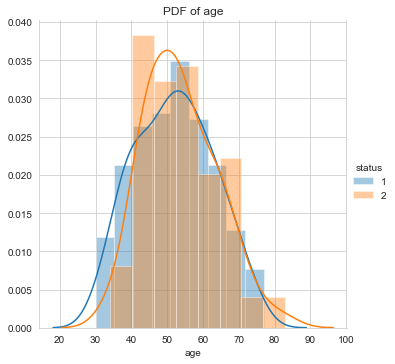

In [15]:
sns.FacetGrid(haber, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend()
plt.title("PDF of age")
plt.show()

#Too much overlapping, not a clear distinction can be made

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


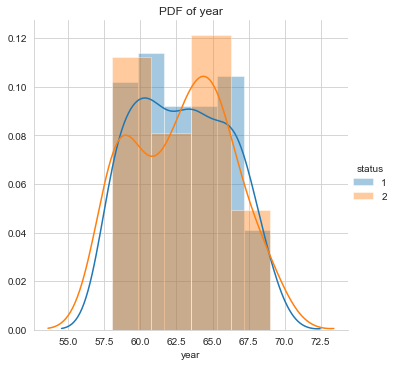

In [16]:
sns.FacetGrid(haber, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend()
plt.title("PDF of year")
plt.show()

#Too much overlapping, not a clear distinction can be made

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


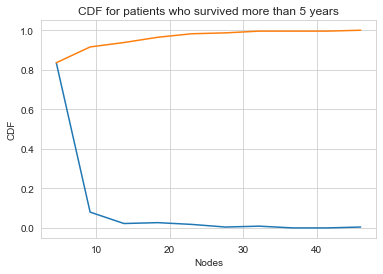

In [17]:
#Cumulative Distribution Function (CDF)

import numpy as np
survived_more_than_5 = haber.loc[haber["status"] == 1]
survived_less_than_5 = haber.loc[haber["status"] == 2]
#Plot CDF of status

counts, bin_edges = np.histogram(survived_more_than_5['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

# counts, bin_edges = np.histogram(survived_less_than_5['nodes'], bins=10, density = True)

# pdf = counts/(sum(counts))
# print(pdf);
# print(bin_edges);
# cdf = np.cumsum(pdf)
# plt.plot(bin_edges[1:],pdf);
# plt.plot(bin_edges[1:], cdf)


plt.xlabel("Nodes")
plt.ylabel("CDF")
plt.title("CDF for patients who survived more than 5 years")
plt.show()

# Here, it can be observed that patients with nodes less than 5 have 50 % or more chances of survival.
# The chances of survival decreases drastically to 10% or less for patients with nodes more than or equal to 8.
# Patients with more than 35 nodes have almost 0 chances of survival.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


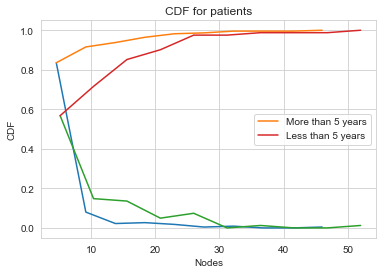

In [18]:
#Cumulative Distribution Function (CDF)

import numpy as np
survived_more_than_5 = haber.loc[haber["status"] == 1]
survived_less_than_5 = haber.loc[haber["status"] == 2]
#Plot CDF of status

counts, bin_edges = np.histogram(survived_more_than_5['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf, label="More than 5 years")

counts, bin_edges = np.histogram(survived_less_than_5['nodes'], bins=10, density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf, label="Less than 5 years")


plt.xlabel("Nodes")
plt.ylabel("CDF")
plt.title("CDF for patients")
plt.legend()
plt.show()

# For patients who survived less than 5 years: 
#  1)  they had more than 3 nodes, 
#  2) Only those with less than or equal to 5 nodes, had more than 50% chances of survival

#In both the cases, patients with more than 35 nodes have almost no chances of survival
#The chances of survival in both cases decreases dramatically to less than 2 % after the no of nodes increases from more than 8-10 nodes

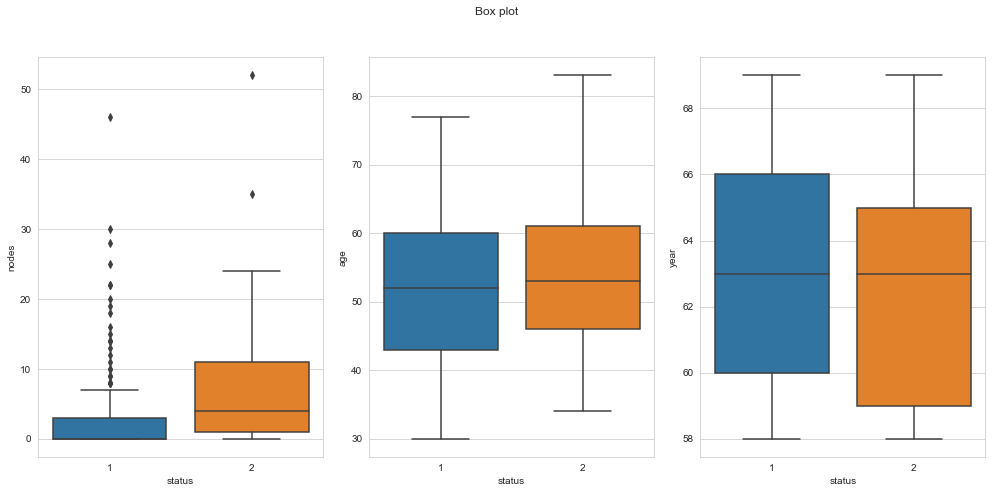

In [19]:
#boxplots
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(14,7))
sns.boxplot(x="status", y="nodes", data=haber, ax=ax1)
 
sns.boxplot(x='status',y='age', data=haber, ax=ax2)
 
sns.boxplot(x='status',y='year', data=haber)
 
plt.tight_layout(pad=1.5)
fig.subplots_adjust(top=0.88)
plt.suptitle("Box plot")
plt.show()


# 75% of people with status 1 had less than or equal to 3 nodes and 50 % of the people with status 2 had less than 5 nodes.
# The age of more than 68 % of patients with the disease lie between 42-60 years.
# The majority of the patients were operated between the years 1959-1966 (a period of 7 years).

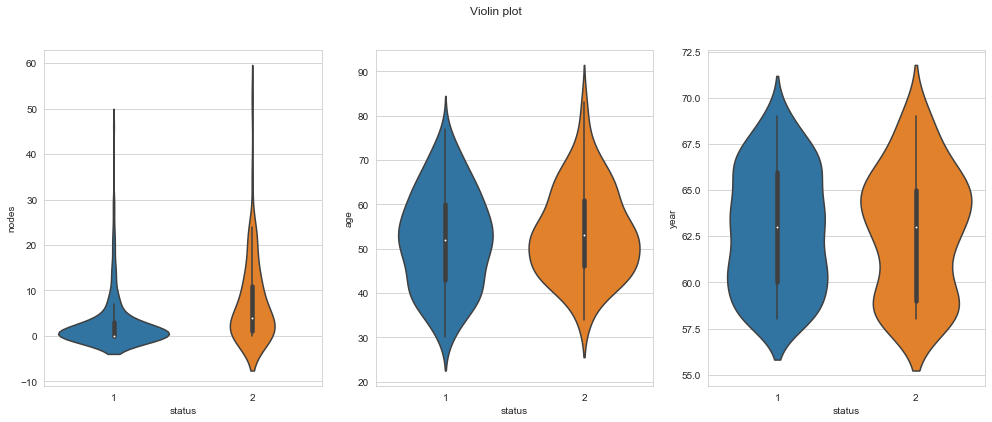

In [20]:
#violinplots
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(14,6))
sns.violinplot(x="status", y="nodes", data=haber, size=8, ax=ax1)

sns.violinplot(x="status", y="age", data=haber, size=8, ax=ax2)

sns.violinplot(x="status", y="year", data=haber, size=8, ax=ax3)

plt.tight_layout(pad=1.5)
fig.subplots_adjust(top=0.88)
plt.suptitle("Violin plot")
plt.show()

# Less than 68% of patients with status 1 have very less number of nodes 0-3. These patients are highly concentrated over a very small node range of 0-3.
# About 68% of patients with status 2 have less than or equal to 10 nodes.

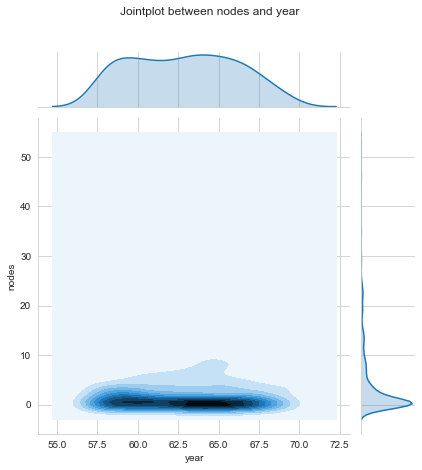

In [21]:
sns.jointplot(x="year", y="nodes", data=haber, kind="kde")
fig.subplots_adjust(top=.95)
plt.suptitle("Jointplot between nodes and year", y=1.08)
plt.show()

# Here, it can be seen that most of the patients have less than 10 nodes.
# But, a dense population of patients over the years had nodes between 0-3. 

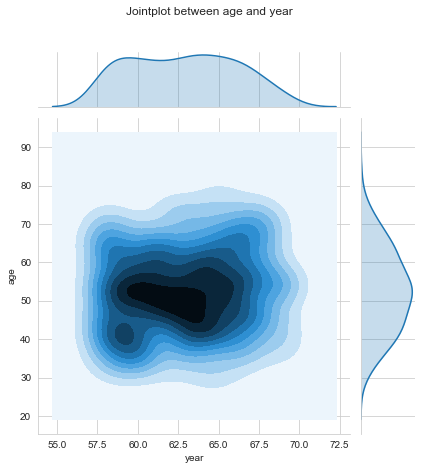

In [22]:
sns.jointplot(x="year", y="age", data=haber, kind="kde")
fig.subplots_adjust(top=.95)
plt.suptitle("Jointplot between age and year", y=1.08)
plt.show()

# Clearly, Majority of the patients are between 40-60 years of age.
# years 1958-1964,saw the highest number of patients with ages between 45-55 years old.

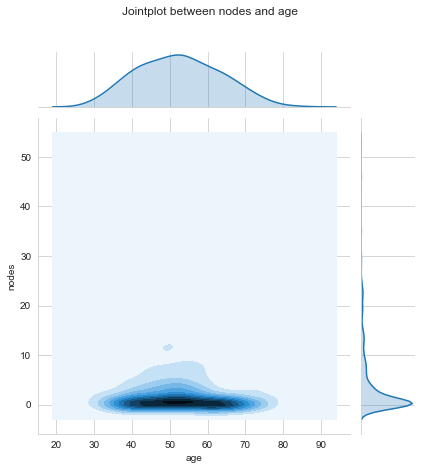

In [23]:
sns.jointplot(x="age", y="nodes", data=haber, kind="kde")
fig.subplots_adjust(top=.95)
plt.suptitle("Jointplot between nodes and age", y=1.08)
plt.show()

# Majority of patients between the ages 35-65 years have nodes between 0-3.

Conclusion:

1. If the number of nodes are less, patients have more chances of surviving longer number of years. For example:
      i) Patients with 0 nodes, have more than 50% chances of surviving more than 5 years.
      ii) Patients with less than 3 nodes, survived for more than 5 years.
      ii) Less than or equal to 75% of patients who survived more than 5 years, had less than or equal to 3 nodes.
      
2. As the number of nodes increases, the chances of survival also decreases. For example:
      i) Patients who survived less than 5 years, had more than 3 nodes.
      ii) Patients with more than 32 nodes have almost Zero chances of survival.
      
3. About 68 % of patients had less than 10 nodes.

4. Patients between the ages 40-60 yrs are more prone to the disease. For example:
      i) The age of less than 68 % of patients with the disease lie between 42-60 years.